In [1]:
#importing relevant libraries 

import pandas as pd 
import numpy as np 
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#Obtaining data from .excel
df_a=pd.read_excel("/Users/celestineudim/PYTHON ANACONDA/MLgashydrateformation/DATA SET/A 0.02.xlsx", 
                   sheet_name='A0.02')
df_a

,Time,T1 (°C),T2 (°C),T3 (°C),P1 (Psi),P2 (Psi),P3 (Psi),P4 (Bar),P5 (Psi),P6 (Psi),Hydrate
0,0,27.0,29.0,33,150,170,150,0.4875,150,150,0
1,2,26.0,27.0,32,130,140,130,0.4857,126,135,0
2,4,25.0,25.0,32,120,140,120,0.4464,125,130,0
3,6,23.0,21.0,31,120,139,120,0.4414,125,130,0
4,8,22.0,21.0,31,119,138,119,0.4268,124,130,0
...,...,...,...,...,...,...,...,...,...,...,...
56,112,3.5,11.0,23,25,42,25,0.1797,32,35,1
57,114,3.5,11.0,23,25,42,25,0.1825,32,35,1
58,116,3.5,11.0,23,25,42,25,0.2302,32,35,1
59,118,3.5,11.0,23,25,42,25,0.1925,32,35,1


Experimental Data are often structured with little or no cleaning / wrangling to be done

In [3]:
column = ['Time', 'T1 (°C)', 'T2 (°C)', 'T3 (°C)', 'P1 (Psi)', 'P2 (Psi) ',
       'P3 (Psi)', 'P4 (Bar)', 'P5 (Psi)', 'P6 (Psi)', 'Hydrate']

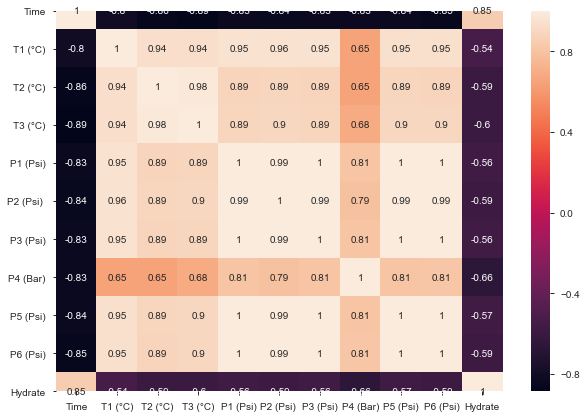

In [4]:
#Exploring / Visualizing data
#.corr() is used to find the pairwise correlation

co = df_a.corr()
plt.subplots(figsize=(10,7))
sns.heatmap(co, annot=True)

The data exhibits a form of multicollinearity called "Data multicollinearity".
This type of multicollinearity is present in the data itself rather than being an artifact of our model. Observational experiments are more likely to exhibit this kind of multicollinearity.

In [5]:
#Reducing Collinearity withing the data
#Note: This Step was lattter ignored because:

The fact that some or all predictor variables are correlated among themselves does not, in general, inhibit our ability to obtain a good fit nor does it tend to affect inferences about mean responses or predictions of new observations.  —Applied Linear Statistical Models, p289, 4th Edition.

In [6]:
#Reducing Collinearity withing the data by normalising it
#This Step was lattter ignored for reasons earlier mentioned

from sklearn import preprocessing

pp_data = preprocessing.normalize(df_a)
pp_df_a = pd.DataFrame(pp_data, columns = column)
pp_df_a

,Time,T1 (°C),T2 (°C),T3 (°C),P1 (Psi),P2 (Psi),P3 (Psi),P4 (Bar),P5 (Psi),P6 (Psi),Hydrate
0,0.000000,0.077441,0.083177,0.094650,0.430227,0.487590,0.430227,0.001398,0.430227,0.430227,0.000000
1,0.006669,0.086698,0.090033,0.106706,0.433492,0.466837,0.433492,0.001620,0.420154,0.450165,0.000000
2,0.013866,0.086664,0.086664,0.110930,0.415987,0.485318,0.415987,0.001547,0.433320,0.450653,0.000000
3,0.020875,0.080021,0.073063,0.107854,0.417500,0.483604,0.417500,0.001536,0.434896,0.452292,0.000000
4,0.028007,0.077019,0.073518,0.108527,0.416603,0.483120,0.416603,0.001494,0.434108,0.455113,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
56,0.824103,0.025753,0.080939,0.169235,0.183951,0.309038,0.183951,0.001322,0.235458,0.257532,0.007358
57,0.828740,0.025444,0.079966,0.167202,0.181741,0.305325,0.181741,0.001327,0.232629,0.254438,0.007270
58,0.833212,0.025140,0.079011,0.165206,0.179571,0.301680,0.179571,0.001653,0.229851,0.251400,0.007183
59,0.837527,0.024842,0.078075,0.163247,0.177442,0.298103,0.177442,0.001366,0.227126,0.248419,0.007098


The normalised data frame has a range within 1 and 0

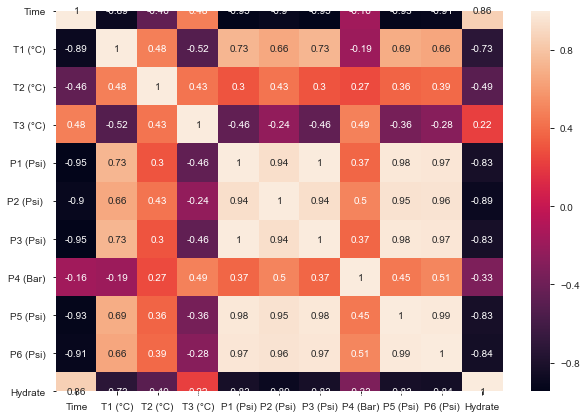

In [7]:
coo = pp_df_a.corr()
plt.subplots(figsize =(10,7))
sns.heatmap(coo, annot=True)

In comparison to the previous Heatmap multicollinearity has been appreciably reduced.

We will now revert back to using our original data with Multicollinrearity 

# ANALYSIS FOR DATA  A (0.02wt% of Plant Extract A)

Predicting Hydrate formation using an Artificial Neural Network (ANN) with Time, Temperature and Pressure as input variables

In [8]:
x_a = df_a[['Time', 'T1 (°C)','P1 (Psi)']]
y_a = df_a['Hydrate']

In [9]:
#splitting testing and training data

from sklearn.model_selection import train_test_split as tts
x_a_train, x_a_test , y_a_train , y_a_test  = tts(x_a,y_a, test_size=0.4, random_state=405)

In [10]:
#This step is carried out for the purpose of redult reproducibility
seed_value = 212
#Note to self 977 = 100% with 50 batches 
#212

# Set Python random seed using environment variable
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# Set Numpy random seed
import random
np.random.seed(seed_value)

# Set TensorFlow random seed
import tensorflow as tf
tf.random.set_seed(seed_value) 

#Importing relevant libraries from tensorflow


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#This ANN has 3 hidden laters 
tf.keras.backend.set_floatx('float64')

ann_a_hyd = Sequential()

ann_a_hyd.add(Dense(units=3,  activation ='relu'))
ann_a_hyd.add(Dense(units=10, activation ='relu'))
ann_a_hyd.add(Dense(units=20, activation ='relu'))
ann_a_hyd.add(Dense(units=20, activation ='relu'))
ann_a_hyd.add(Dense(units=10, activation ='relu'))
ann_a_hyd.add(Dense(units=1,  activation ='sigmoid'))


ann_a_hyd.compile(optimizer = "adam" , 
           loss= "binary_crossentropy" ,
           metrics=['accuracy'])


ann_a_hyd.fit(x_a_train, y_a_train, 
            epochs=150, batch_size =50, validation_split=0.3)



Epoch 1/150
1/1 [==============================] - 0s 306ms/step - loss: 1.1139 - accuracy: 0.2800 - val_loss: 0.9248 - val_accuracy: 0.3636
Epoch 2/150
1/1 [==============================] - 0s 38ms/step - loss: 1.0349 - accuracy: 0.2800 - val_loss: 0.8587 - val_accuracy: 0.3636
Epoch 3/150
1/1 [==============================] - 0s 39ms/step - loss: 0.9633 - accuracy: 0.2800 - val_loss: 0.7988 - val_accuracy: 0.3636
Epoch 4/150
1/1 [==============================] - 0s 40ms/step - loss: 0.8992 - accuracy: 0.2800 - val_loss: 0.7464 - val_accuracy: 0.3636
Epoch 5/150
1/1 [==============================] - 0s 36ms/step - loss: 0.8424 - accuracy: 0.2800 - val_loss: 0.7004 - val_accuracy: 0.3636
Epoch 6/150
1/1 [==============================] - 0s 35ms/step - loss: 0.7928 - accuracy: 0.2800 - val_loss: 0.6603 - val_accuracy: 0.2727
Epoch 7/150
1/1 [==============================] - 0s 36ms/step - loss: 0.7497 - accuracy: 0.2000 - val_loss: 0.6259 - val_accuracy: 0.6364
Epoch 8/150
1/1 [==

1/1 [==============================] - 0s 33ms/step - loss: 0.0439 - accuracy: 1.0000 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 118/150
1/1 [==============================] - 0s 36ms/step - loss: 0.0431 - accuracy: 1.0000 - val_loss: 0.0250 - val_accuracy: 1.0000
Epoch 119/150
1/1 [==============================] - 0s 36ms/step - loss: 0.0423 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 120/150
1/1 [==============================] - 0s 33ms/step - loss: 0.0416 - accuracy: 1.0000 - val_loss: 0.0237 - val_accuracy: 1.0000
Epoch 121/150
1/1 [==============================] - 0s 34ms/step - loss: 0.0409 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 122/150
1/1 [==============================] - 0s 45ms/step - loss: 0.0402 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 123/150
1/1 [==============================] - 0s 33ms/step - loss: 0.0395 - accuracy: 1.0000 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 124/150
1/1 [=

In [11]:
#ploting the keys of the ANN 
#ann_a_hyd.history.history.keys()

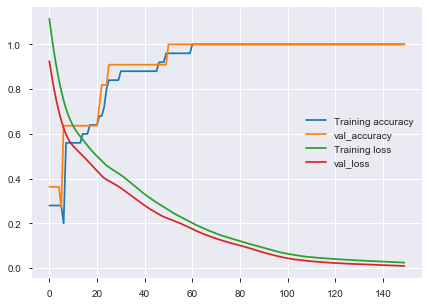

In [12]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(7,5))

figure1:plt.plot(ann_a_hyd.history.history['accuracy'])
figure2:plt.plot(ann_a_hyd.history.history['val_accuracy'])
figure3:plt.plot(ann_a_hyd.history.history['loss'])
figure4:plt.plot(ann_a_hyd.history.history['val_loss'])


plt.legend(['Training accuracy', 'val_accuracy', 'Training loss', 'val_loss'])


In [13]:
ann_a_hyd.evaluate(x_a_test, y_a_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9200


[0.08967621624469757, 0.92]

The developed ANN model has a ccuracy of approxiamtely 100%
As a rule of thumb, the Accuracy should be higher than the val_accurracy

In [14]:
#Saving this model
ann_a_hyd.save('ann_model_hyd.h5')

#to loadup model, uncomment the codes below
#from keras.models import load_model
#variable name = load_model('ann_model_hyd.h5')

In [15]:
#Visualising model accuracy on data frame

prediction_a = ann_a_hyd.predict(x_a)
flatten_a_prediction = prediction_a.flatten()
round_up_prediction_a = flatten_a_prediction.round()

Predictions_df_a = pd.DataFrame()
Predictions_df_a['Predicted Value'] = round_up_prediction_a
Predictions_df_a['Actual Values'] = y_a

#set data frame to see maximum rows
pd.set_option('display.max_rows', None)

Predictions_df_a

,Predicted Value,Actual Values
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
5,0.0,0
6,0.0,0
7,0.0,0
8,0.0,0
9,0.0,0


Text(0.5, 1.0, 'Distribution of Actual and Predicted Values (ANN - A0.02wt%)')

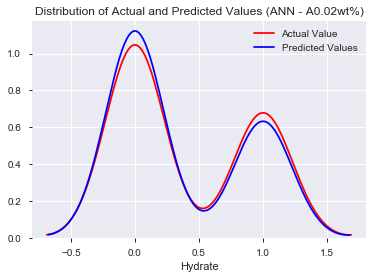

In [16]:
#Distribution plot of predicted and actual values
ax1 = sns.distplot(y_a, hist=False, color="r", label="Actual Value")
sns.distplot(round_up_prediction_a, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('Distribution of Actual and Predicted Values (ANN - A0.02wt%)')

Using Supervised Learning to predict Pressure behaviour / trend values with Temperature T1 (°C) and Time as inputs

In [17]:
x_a_trend = np. array (df_a[['Time','T1 (°C)']])
y_a_trend = np.array (df_a['P1 (Psi)'])

In [18]:
#Splitting Test and Training dataset

x_a_trend_train ,x_a_trend_test, y_a_trend_train, y_a_trend_test = tts(x_a_trend, y_a_trend,
                                                                       train_size=0.6,random_state = 45)

In [19]:
#Using XGBoost Regressor
import xgboost as xgb

model_xgb = xgb.XGBRegressor(booster= 'gbtree')
xgb_a = model_xgb.fit(x_a_trend_test,y_a_trend_test)
xgb_a.score(x_a_trend_test,y_a_trend_test)

[23:44:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9999679050069445

Text(0.5, 1.0, 'Distribution of Actual and Predicted Values (XGBoost - A0.02wt%)')

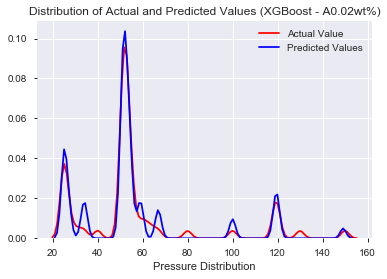

In [20]:
#Distribution plot of XGBoost predicted and actual values
ax1 = sns.distplot(y_a_trend, hist=False, color="r", label="Actual Value")
sns.distplot(xgb_a.predict(x_a_trend), hist=False, color="b", label="Predicted Values",axlabel='Pressure Distribution', ax=ax1)
plt.title('Distribution of Actual and Predicted Values (XGBoost - A0.02wt%)')

XGBoost is among very powerful and popular machine learning algorithms, which provides high accuracy for large datasets due to its optimized implementation. This algorithm follows the boosting concept, where weak learners (decision trees) are grown sequentially
The model itself is optimized using a gradient descent algorithm; as a result, it provides higher accuracy

In [21]:
#Using LinearRegression
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
lr_a = model_lr.fit(x_a_trend_test,y_a_trend_test)
lr_a.score(x_a_trend_test,y_a_trend_test)

0.9228210076365227

Text(0.5, 1.0, 'Distribution of Actual and Predicted Values (LinearRegression - A0.02wt%)')

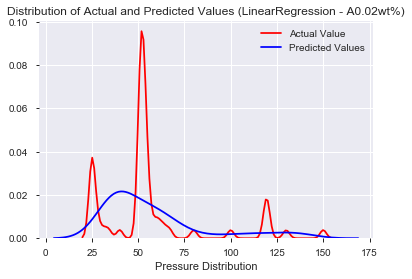

In [22]:
#Distribution plot of LinearRegression predicted and actual values
ax1 = sns.distplot(y_a_trend, hist=False, color="r", label="Actual Value")
sns.distplot(lr_a.predict(x_a_trend), hist=False, color="b", label="Predicted Values", axlabel='Pressure Distribution', ax=ax1)
plt.title('Distribution of Actual and Predicted Values (LinearRegression - A0.02wt%)')

In [23]:
lr_a.coef_

array([-0.14419247,  3.81789784])

In [55]:
lr_a.intercept_

37.074410210358145

In [24]:
#Using GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB_a = GB.fit(x_a_trend_train,y_a_trend_train)
GB_a.score(x_a_trend_test,y_a_trend_test)

0.9724635027871399

Text(0.5, 1.0, 'Distribution of Actual and Predicted Values (GradientBoostingRegressor - A0.02wt%)')

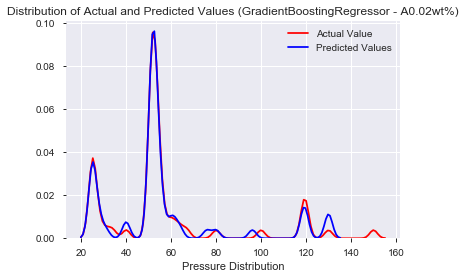

In [25]:
#Distribution plot of GradientBoostingRegressor predicted and actual values
ax1 = sns.distplot(y_a_trend, hist=False, color="r", label="Actual Value")
sns.distplot(GB_a.predict(x_a_trend), hist=False, color="b", label="Predicted Values", axlabel='Pressure Distribution', ax=ax1)
plt.title('Distribution of Actual and Predicted Values (GradientBoostingRegressor - A0.02wt%)')

GradientBoostingRegressor ia a tree based learner and has no coefficients

# ANALYSIS FOR DATA  B (0.06wt% of Plant Extract B)

Predicting Hydrate formation using an Artificial Neural Network (ANN) with Time, Temperature and Pressure as input variables

In [26]:
#Importing data

df_b =pd.read_excel('/Users/celestineudim/PYTHON ANACONDA/MLgashydrateformation/DATA SET/A 0.02.xlsx',
                      sheet_name='B0.06')

In [27]:
x_b = df_b [['Time', 'T1 (°C)','P1 (Psi)']]
y_b = df_b ['Hydrate'] 

#Splitting ttrain and test data set
x_b_train, x_b_test, y_b_train , y_b_test = tts(x_b, y_b, test_size=0.3 , random_state =5)

In [28]:
#This step is carried out for the purpose of redult reproducibility
seed_value = 26
#Note to self 26 = .94%

# Set Python random seed using environment variable
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# Set Numpy random seed
import random
np.random.seed(seed_value)

# Set TensorFlow random seed
import tensorflow as tf
tf.random.set_seed(seed_value) 

#Importing relevant libraries from tensorflow


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#This ANN has 4 hidden laters 
tf.keras.backend.set_floatx('float64')


ann_b_hyd = Sequential()

ann_b_hyd.add(Dense(units=3,   activation ='relu'))
ann_b_hyd.add(Dense(units=10,  activation ='relu'))
ann_b_hyd.add(Dense(units=15,  activation ='relu'))
ann_b_hyd.add(Dense(units=15,  activation ='relu'))
ann_b_hyd.add(Dense(units=10,  activation ='relu'))
ann_b_hyd.add(Dense(units=1,   activation ='sigmoid'))

#adam , SGD
#binary_crossentropy, hinge

ann_b_hyd.compile(optimizer= "adam",
                 loss = 'hinge',
                 metrics = ['accuracy'])

ann_b_hyd.fit (x_b_train, y_b_train, epochs = 60, batch_size = 40, validation_split=0.30)



Epoch 1/60
1/1 [==============================] - 0s 210ms/step - loss: 0.5871 - accuracy: 0.7241 - val_loss: 0.4959 - val_accuracy: 0.7692
Epoch 2/60
1/1 [==============================] - 0s 52ms/step - loss: 0.5685 - accuracy: 0.7241 - val_loss: 0.4811 - val_accuracy: 0.7692
Epoch 3/60
1/1 [==============================] - 0s 46ms/step - loss: 0.5537 - accuracy: 0.7241 - val_loss: 0.4693 - val_accuracy: 0.7692
Epoch 4/60
1/1 [==============================] - 0s 36ms/step - loss: 0.5397 - accuracy: 0.7241 - val_loss: 0.4598 - val_accuracy: 0.7692
Epoch 5/60
1/1 [==============================] - 0s 37ms/step - loss: 0.5261 - accuracy: 0.7586 - val_loss: 0.4515 - val_accuracy: 0.7692
Epoch 6/60
1/1 [==============================] - 0s 37ms/step - loss: 0.5121 - accuracy: 0.7931 - val_loss: 0.4436 - val_accuracy: 0.7692
Epoch 7/60
1/1 [==============================] - 0s 43ms/step - loss: 0.4983 - accuracy: 0.7931 - val_loss: 0.4354 - val_accuracy: 0.7692
Epoch 8/60
1/1 [==========

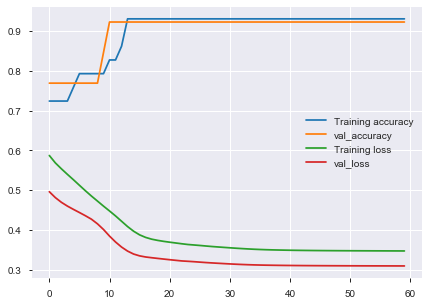

In [29]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(7,5))

figure1:plt.plot(ann_b_hyd.history.history['accuracy'])
figure2:plt.plot(ann_b_hyd.history.history['val_accuracy'])
figure3:plt.plot(ann_b_hyd.history.history['loss'])
figure4:plt.plot(ann_b_hyd.history.history['val_loss'])



plt.legend(['Training accuracy', 'val_accuracy', 'Training loss', 'val_loss'])

In [30]:
ann_b_hyd.evaluate ( x_b_test, y_b_test)
#0.93

1/1 [==============================] - 0s 1ms/step - loss: 0.2128 - accuracy: 1.0000


[0.21280236542224884, 1.0]

Text(0.5, 1.0, 'Distribution of Actual and Predicted Values (ANN - B0.02wt%)')

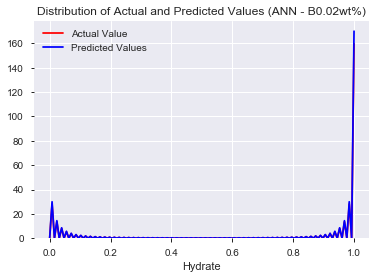

In [31]:
#Visualising model accuracy on data frame

prediction_b = ann_b_hyd.predict(x_b)
flatten_b_prediction = prediction_b.flatten()
round_up_prediction_b = flatten_b_prediction.round()

Predictions_df_b = pd.DataFrame()
Predictions_df_b['Predicted Value'] = round_up_prediction_b
Predictions_df_b['Actual Values'] = y_b

#Distribution plot of predicted and actual values
ax1 = sns.distplot(y_b, hist=False, color="r", label="Actual Value")
sns.distplot(round_up_prediction_b, hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('Distribution of Actual and Predicted Values (ANN - B0.02wt%)')

In [32]:
Predictions_df_b

,Predicted Value,Actual Values
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
5,0.0,0
6,0.0,0
7,0.0,0
8,0.0,0
9,0.0,0


Using Supervised Learning to predict Pressure behaviour / trend values with Temperature T1 (°C) and Time as inputs

In [33]:
x_b_trend = df_b [['Time', 'T1 (°C)']]
y_b_trend = df_b ['P1 (Psi)'] 

x_b_trend_train,x_b_trend_test,y_b_trend_train,y_b_trend_test=tts(x_b_trend,y_b_trend, 
                                                                  test_size =0.3,random_state=415)

In [34]:
#Using XGBoost Regressor
import xgboost as xgb

model_xgb = xgb.XGBRegressor()
xgb_b = model_xgb.fit(x_b_trend_train,y_b_trend_train)
xgb_b.score(x_b_trend_test,y_b_trend_test)

[23:44:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.9704808150762598

Text(0.5, 1.0, 'Distribution of Actual and Predicted Values (XGBoost - B0.06wt%)')

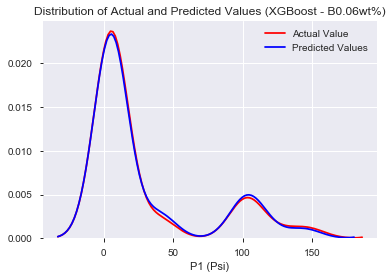

In [35]:
#Distribution plot of XGBoost predicted and actual values
ax1 = sns.distplot(y_b_trend, hist=False, color="r", label="Actual Value")
sns.distplot(xgb_b.predict(x_b_trend), hist=False, color="b", label="Predicted Values" , ax=ax1)
plt.title('Distribution of Actual and Predicted Values (XGBoost - B0.06wt%)')

In [36]:
#Using LinearRegression
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
lr_b = model_lr.fit(x_b_trend_test,y_b_trend_test)
lr_b.score(x_b_trend_test,y_b_trend_test)

0.9958879983614152

Text(0.5, 1.0, 'Distribution of Actual and Predicted Values (LinearRegression - B0.06wt%)')

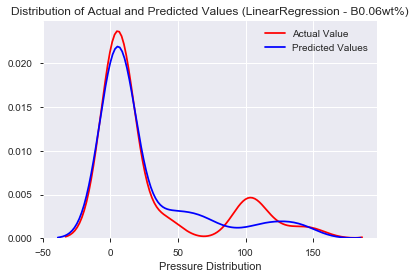

In [37]:
#Distribution plot of LinearRegression predicted and actual values
ax1 = sns.distplot(y_b_trend, hist=False, color="r", label="Actual Value")
sns.distplot(lr_b.predict(x_b_trend), hist=False, color="b", label="Predicted Values", axlabel='Pressure Distribution', ax=ax1)
plt.title('Distribution of Actual and Predicted Values (LinearRegression - B0.06wt%)')

In [38]:
lr_b.coef_

array([0.215345  , 5.08101241])

In [56]:
lr_b.intercept_

-5.629385325967732

In [39]:
#Using GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB_b = GB.fit(x_b_trend_train,y_b_trend_train)
GB_b.score(x_b_trend_test,y_b_trend_test)

0.982629750338274

Text(0.5, 1.0, 'Distribution of Actual and Predicted Values (GradientBoostingRegressor - B0.06wt%)')

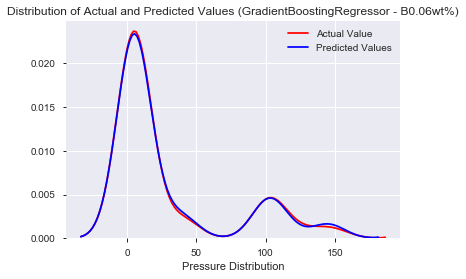

In [40]:
#Distribution plot of GradientBoostingRegressor predicted and actual values
ax1 = sns.distplot(y_b_trend, hist=False, color="r", label="Actual Value")
sns.distplot(GB_b.predict(x_b_trend), hist=False, color="b", label="Predicted Values", axlabel='Pressure Distribution', ax=ax1)
plt.title('Distribution of Actual and Predicted Values (GradientBoostingRegressor - B0.06wt%)')

# ANALYSIS FOR DATA  C (0.1wt% of Plant Extract C)

In [41]:
df_c =pd.read_excel('/Users/celestineudim/PYTHON ANACONDA/MLgashydrateformation/DATA SET/A 0.02.xlsx',
                    sheet_name='C0.1')

In [42]:
x_c = df_c [['Time', 'T1 (°C)','P1 (Psi)']]
y_c = df_c ['Hydrate '] 

x_c_test, x_c_train, y_c_test, y_c_train = tts (x_c, y_c,test_size=0.3, random_state = 30)

Most of the libraries loaded below had been loaded earlier, reloading them are not necessary

In [43]:
#This step is carried out for the purpose of redult reproducibility
seed_value = 6051
#1114 , 6584 66

# Set Python random seed using environment variable
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# Set Numpy random seed
import random
np.random.seed(seed_value)

# Set TensorFlow random seed
import tensorflow as tf
tf.random.set_seed(seed_value) 

#Importing relevant libraries from tensorflow


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



ann_c_hyd = Sequential()

ann_c_hyd.add(Dense(units=3,   activation ='relu'))
ann_c_hyd.add(Dense(units=10,  activation ='relu'))
ann_c_hyd.add(Dense(units=15,  activation ='relu'))
ann_c_hyd.add(Dense(units=18,  activation ='relu'))
ann_c_hyd.add(Dense(units=15,  activation ='relu'))
ann_c_hyd.add(Dense(units=10,  activation ='relu'))
ann_c_hyd.add(Dense(units=1,   activation ='sigmoid'))

ann_c_hyd.compile(optimizer= 'adam',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

ann_c_hyd.fit (x_c_train, y_c_train,
              epochs = 80,
              batch_size = 30,
              validation_split=0.3)


Epoch 1/80
1/1 [==============================] - 0s 161ms/step - loss: 3.0688 - accuracy: 0.3077 - val_loss: 2.8090 - val_accuracy: 0.3333
Epoch 2/80
1/1 [==============================] - 0s 35ms/step - loss: 2.8214 - accuracy: 0.3077 - val_loss: 2.5681 - val_accuracy: 0.3333
Epoch 3/80
1/1 [==============================] - 0s 38ms/step - loss: 2.5846 - accuracy: 0.3077 - val_loss: 2.3374 - val_accuracy: 0.3333
Epoch 4/80
1/1 [==============================] - 0s 33ms/step - loss: 2.3557 - accuracy: 0.3077 - val_loss: 2.1115 - val_accuracy: 0.3333
Epoch 5/80
1/1 [==============================] - 0s 35ms/step - loss: 2.1363 - accuracy: 0.3077 - val_loss: 1.8950 - val_accuracy: 0.3333
Epoch 6/80
1/1 [==============================] - 0s 34ms/step - loss: 1.9276 - accuracy: 0.3077 - val_loss: 1.6916 - val_accuracy: 0.3333
Epoch 7/80
1/1 [==============================] - 0s 52ms/step - loss: 1.7300 - accuracy: 0.3077 - val_loss: 1.4997 - val_accuracy: 0.3333
Epoch 8/80
1/1 [==========

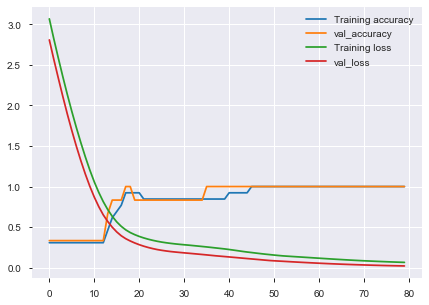

In [44]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(7,5))

figure1:plt.plot(ann_c_hyd.history.history['accuracy'])
figure2:plt.plot(ann_c_hyd.history.history['val_accuracy'])
figure3:plt.plot(ann_c_hyd.history.history['loss'])
figure4:plt.plot(ann_c_hyd.history.history['val_loss'])


plt.legend(['Training accuracy', 'val_accuracy', 'Training loss', 'val_loss'])

In [45]:
ann_c_hyd.evaluate (x_c_test, y_c_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9762


[0.040405831166676114, 0.9761904761904762]

Text(0.5, 1.0, 'Distribution of Actual and Predicted Values (ANN - C0.1wt%)')

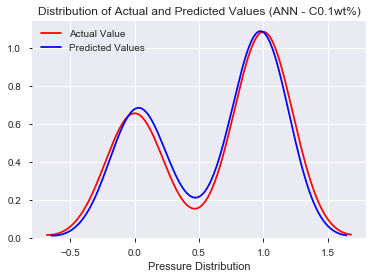

In [46]:
#Distribution plot of ANN predicted and actual values
ax1 = sns.distplot(y_c, hist=False, color="r", label="Actual Value")
sns.distplot(ann_c_hyd.predict(x_c), hist=False, color="b", label="Predicted Values", axlabel='Pressure Distribution', ax=ax1)
plt.title('Distribution of Actual and Predicted Values (ANN - C0.1wt%)')

Using Supervised Learning to predict Pressure behaviour / trend values on Data C 
*Input  = Temperature T1 (°C) and Time
*Output = Pressure

In [47]:
x_c_trend = df_c [['Time', 'T1 (°C)']]
y_c_trend = df_c ['P1 (Psi)'] 

x_c_trend_train,x_c_trend_test,y_c_trend_train,y_c_trend_test=tts(x_c_trend,y_c_trend, 
                                                                  test_size =0.3,random_state=35)

In [48]:
#Using XGBoost Regressor
import xgboost as xgb

model_xgb = xgb.XGBRegressor()
xgb_c = model_xgb.fit(x_c_trend_train,y_c_trend_train)
xgb_c.score(x_c_trend_test,y_c_trend_test)

[23:44:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.986928380436979

Text(0.5, 1.0, 'Distribution of Actual and Predicted Values (XGBoost - C0.1wt%)')

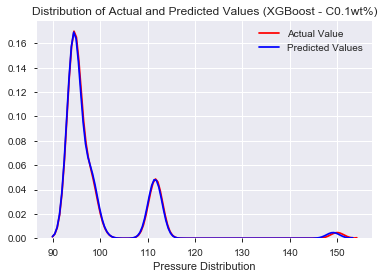

In [49]:
#Distribution plot of LinearRegression predicted and actual values
ax1 = sns.distplot(y_c_trend, hist=False, color="r", label="Actual Value")
sns.distplot(xgb_c.predict(x_c_trend), hist=False, color="b", label="Predicted Values", axlabel='Pressure Distribution', ax=ax1)
plt.title('Distribution of Actual and Predicted Values (XGBoost - C0.1wt%)')

In [50]:
#Using LinearRegression
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
lr_c = model_lr.fit(x_c_trend_test,y_c_trend_test)
lr_c.score(x_c_trend_test,y_c_trend_test)

0.9569886783724417

Text(0.5, 1.0, 'Distribution of Actual and Predicted Values (LinearRegressor - C0.1wt%)')

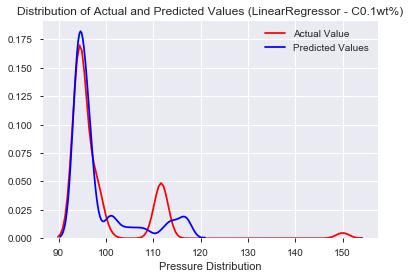

In [51]:
#Distribution plot of LinearRegression predicted and actual values
ax1 = sns.distplot(y_c_trend, hist=False, color="r", label="Actual Value")
sns.distplot(lr_c.predict(x_c_trend), hist=False, color="b", label="Predicted Values", axlabel='Pressure Distribution', ax=ax1)
plt.title('Distribution of Actual and Predicted Values (LinearRegressor - C0.1wt%)')

In [52]:
lr_c.coef_

array([0.00401131, 0.85722124])

In [58]:
lr_c.intercept_

93.2036390656232

In [53]:
#Using GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB_c = GB.fit(x_c_trend_train,y_c_trend_train)
GB_c.score(x_c_trend_test,y_c_trend_test)

0.9970742260430476

Text(0.5, 1.0, 'Distribution of Actual and Predicted Values (GradientBoostingRegressor - C0.1wt%)')

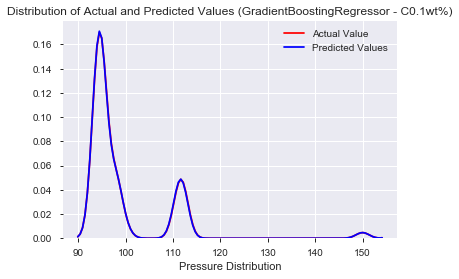

In [54]:
#Distribution plot of GradientBoostingRegressor predicted and actual values
ax1 = sns.distplot(y_c_trend, hist=False, color="r", label="Actual Value")
sns.distplot(GB_c.predict(x_c_trend), hist=False, color="b", label="Predicted Values", axlabel='Pressure Distribution', ax=ax1)
plt.title('Distribution of Actual and Predicted Values (GradientBoostingRegressor - C0.1wt%)')